In [11]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Warm up activities

In [28]:
# loading the dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### What is average age of passengers?

In [13]:
df['Age'].mean()

29.69911764705882

##### Who were the survivors ?

In [16]:
df.loc[df['Survived'] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### Check if we have missing value in `Age` column

In [29]:
# we have 177 missing value in `Age` column
df['Age'].isna().sum()

# to see the row of those missing value
# df.loc[df['Age'].isna()]

177

In [31]:
# replace the missing value to be a mean of avg age
df['Age'] = df['Age'].fillna(df['Age'].mean())

#### Activities

##### Rich People Survive?
Does wealth determine fate in a crisis? Let’s dive into the class system aboard the Titanic by visualizing survival rates based on passenger class. This bar chart paints a vivid picture of how socio-economic status may have played a role in determining who lived and who perished during one of history's most infamous maritime disasters.

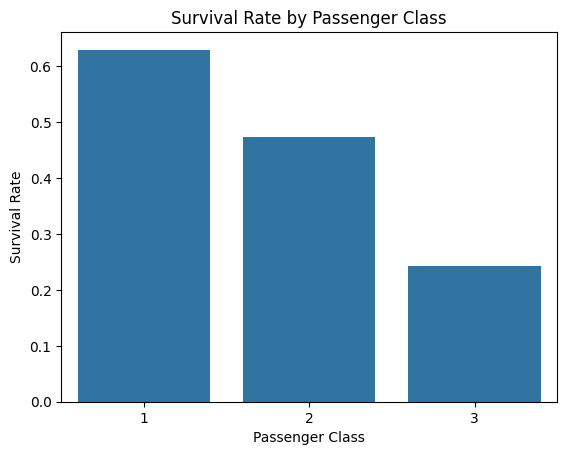

In [43]:
survival_by_class = df.groupby('Pclass')['Survived'].mean().reset_index()
survival_by_class
sns.barplot(x='Pclass', y='Survived', data=survival_by_class)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

First-class passengers were significantly more likely to survive, with over 60% survival rate, whereas third-class passengers faced the greatest risk. This stark contrast highlights the impact of social class on survival during the tragedy.

##### Calculating the age difference from the mean age

In [46]:
mean_age = df['Age'].mean()
age_difference = df['Age'] - mean_age
age_difference

0      -7.699118
1       8.300882
2      -3.699118
3       5.300882
4       5.300882
         ...    
886    -2.699118
887   -10.699118
888     0.000000
889    -3.699118
890     2.300882
Name: Age, Length: 891, dtype: float64

##### Normalize the Fare column

In [48]:
fare_min = df['Fare'].min()
fare_max = df['Fare'].max()
normalized_fare = (df['Fare'] - fare_min) / (fare_max - fare_min)
normalized_fare

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare, Length: 891, dtype: float64

Normalization scales values between 0 and 1, making comparisons easier.

##### Calculate family size

In [51]:
family_size = df['SibSp'] + df['Parch'] + 1
family_size

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Length: 891, dtype: int64

##### Calculate Fare Per Family Member

In [52]:
fare_per_family_member = df['Fare'] / family_size
fare_per_family_member

0       3.62500
1      35.64165
2       7.92500
3      26.55000
4       8.05000
         ...   
886    13.00000
887    30.00000
888     5.86250
889    30.00000
890     7.75000
Length: 891, dtype: float64

#### Age Comparison?
Curious about the age makeup of passengers in each class aboard the Titanic? This histogram will take you through the age distribution across the different passenger classes, revealing the dynamics between age and class structure during this fateful journey.

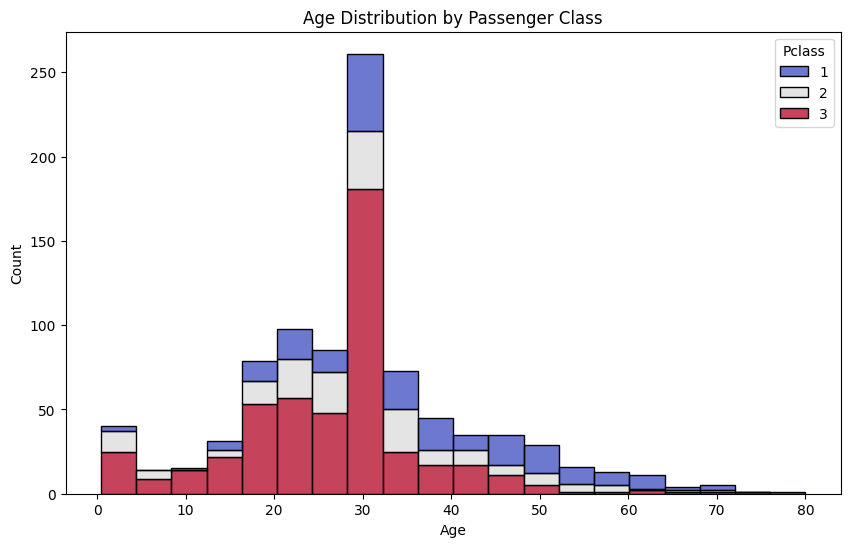

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(df, x='Age', hue='Pclass', multiple='stack', bins=20, palette='coolwarm')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### Calculate Weighted Age Using Fare Weight

In [54]:
fare_weight = df['Fare'] / fare_max
fare_weight

weighted_age = df['Age'] * fare_weight
weighted_age

0      0.311323
1      5.287158
2      0.402183
3      3.627550
4      0.549939
         ...   
886    0.685106
887    1.112566
888    1.359369
889    1.522459
890    0.484064
Length: 891, dtype: float64

This assigns more weight to ages of passengers who paid higher fares.

##### Calculate Cumulative Fare Percentage

In [55]:
sorted_fares = df['Fare'].sort_values()
cumulative_fare_percentage = (sorted_fares.cumsum() / df['Fare'].sum()) * 100
cumulative_fare_percentage

271      0.000000
597      0.000000
302      0.000000
633      0.000000
277      0.000000
          ...    
438     93.726944
341     94.643513
737     96.429009
258     98.214504
679    100.000000
Name: Fare, Length: 891, dtype: float64

This determines how the cumulative sum of fares contributes to the total revenue.


##### Identify Fare Outliers Using IQR

In [58]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
is_fare_outlier = (df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR))
df.loc[is_fare_outlier]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S


The Interquartile Range (IQR) method identifies outliers, where fares significantly deviate from typical values.

##### Calculate Rolling Average of Fare

Sort the dataset by its index and then calculate the rolling average of the Fare over a window of 10 rows.

The minimum number of periods required for calculation is 1.

In [59]:
sorted_df = df.sort_index()
rolling_average_fare = sorted_df['Fare'].rolling(window=10, min_periods=1).mean()
rolling_average_fare

0       7.250000
1      39.266650
2      28.819433
3      34.889575
4      29.521660
         ...    
886    20.303740
887    22.514160
888    24.069580
889    18.753750
890    16.928750
Name: Fare, Length: 891, dtype: float64

This smooths fare data by averaging over a window of 10 rows.

##### Determine the most frequently occurring ticket numbers. 

In [76]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

##### Create a new column `Has_Cabin` that is True if a passenger has a cabin assigned and False otherwise.

In [74]:
Has_Cabin = df['Cabin'].notna()
Has_Cabin.sum()

204

#####  Categorizing Passengers Based on Cabin Deck

In [127]:
df['Deck'] = df['Cabin'].str[0]
df['Deck'].dropna()

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: Deck, Length: 204, dtype: object

##### Calculate the survival rate for passengers who embarked at each port.

In [140]:
import numpy as np
survival_rate_percentage = df.groupby('Embarked')['Survived'].mean() * 100
survival_rate_percentage = np.ceil(survival_rate_percentage).reset_index()
survival_rate_percentage

,Embarked,Survived
0,C,56.0
1,Q,39.0
2,S,34.0


##### Identify how many passengers had duplicate ticket numbers (i.e., more than one person with the same `Ticket`).

In [141]:
duplicate_tickets = df[df.duplicated(subset='Ticket')]
duplicate_ticket_count = duplicate_tickets['Ticket'].nunique()
duplicate_ticket_count

134

##### Determine the highest fare paid for each embarkation port.

In [110]:
df.groupby('Embarked')['Fare'].max()

Embarked
C    512.3292
Q     90.0000
S    263.0000
Name: Fare, dtype: float64

#### What role does age play in the odds of survival? 
Let’s take a closer look at how age influenced survival during the Titanic disaster. This distribution plot will reveal whether certain age groups were more likely to make it through the tragedy, uncovering patterns that history may have hidden beneath the waves.

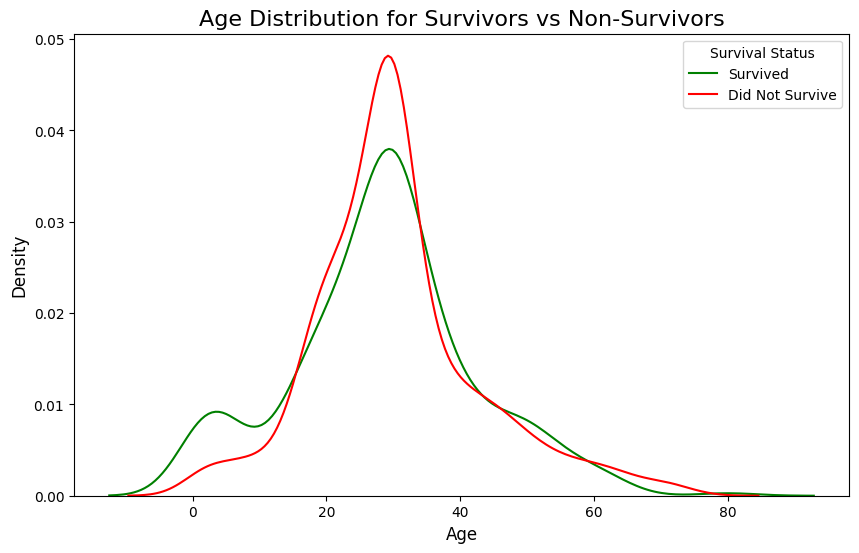

In [109]:
# Create a KDE plot for the age distribution of survivors vs non-survivors
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', color='green')
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', color='red')

# Add labels and title
plt.title('Age Distribution for Survivors vs Non-Survivors', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Survival Status')
plt.show()